## Linear regression
In this notebook you will become acquainted with linear regression in scikit-learn. As per usual we start by importing the necessary packages.

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.style.use('ggplot') #for visual style
%matplotlib inline

First we demonstrate how trivial it is to do linear regression using scikit-learn. Start by making a random linear data set using `make_regression`.

In [23]:
X, y, coef = make_regression(n_samples=20, n_features=1, 
                             n_informative=1, noise=5, 
                             coef=True, random_state=0)

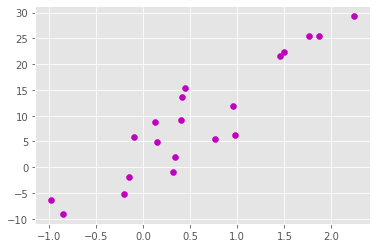

In [3]:
plt.scatter(X,y, c='m')

In [4]:
lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)

#### Ex 1. Plot the linear regression line together with the data points.

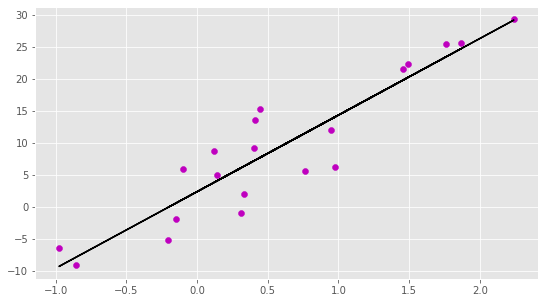

In [5]:
plt.figure(figsize=(9,5))
plt.scatter(X,y, c='m')
plt.plot(X, y_hat, c='k')

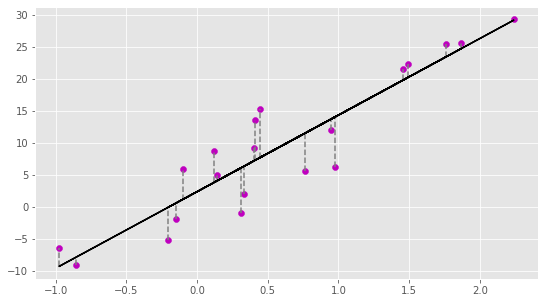

In [6]:
errors = y_hat-y
y_min = [min(v) for v in zip(y_hat, y)]
y_max = [max(v) for v in zip(y_hat, y)]

plt.figure(figsize=(9, 5))
plt.scatter(X,y, c='m')
plt.plot(X, y_hat, c='k')
plt.vlines(X, y_min, y_max, linestyle='dashed', color='gray')

### Non-linear regression using linear regression
While it sounds like a difficult task to generalize linear regression to higher order polynomials, this can be incorporated using the exact same algorithm with a clever trick. 

We can use a simple polynomial basis function using the `PolynomialFeatures` available from sklearn. For example, choosing degree=2, we obtain the following mapping.

$\Phi(x) = (1,x,x^2)$


Transforming the input features using $\Phi(x)$, we can retrain a linear regression model.

In [7]:
#https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-model-from-regression-to-sparsity

A word on scikit-learn: everything in sklearn is treated in an object oriented manner. A machine learning model is an *object* which can be trained, used for prediction, and has many associated attributed (such as the model parameters etc.) Data transformers like `Polynomial Features` does also follow this paradigm. 

In [16]:
poly = PolynomialFeatures(2) #make a 
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

The `fit_transform` method is used to transform X like below. Now instead of a vector, we have a matrix, where each row corresponds to the transformation of a single value in X. 

In [21]:
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.        , -0.15135721,  0.022909  ],
       [ 1.        ,  0.40015721,  0.16012579],
       [ 1.        ,  0.97873798,  0.95792804],
       [ 1.        , -0.85409574,  0.72947953],
       [ 1.        , -0.97727788,  0.95507205],
       [ 1.        ,  0.3130677 ,  0.09801139],
       [ 1.        , -0.10321885,  0.01065413],
       [ 1.        , -0.20515826,  0.04208991],
       [ 1.        ,  0.33367433,  0.11133856],
       [ 1.        ,  1.49407907,  2.23227228],
       [ 1.        ,  0.95008842,  0.902668  ],
       [ 1.        ,  0.12167502,  0.01480481],
       [ 1.        ,  1.45427351,  2.11491143],
       [ 1.        ,  1.86755799,  3.48777285],
       [ 1.        ,  0.14404357,  0.02074855],
       [ 1.        ,  0.4105985 ,  0.16859113],
       [ 1.        ,  0.76103773,  0.57917842],
       [ 1.        ,  2.2408932 ,  5.02160233],
       [ 1.        ,  0.44386323,  0.19701457],
       [ 1.        ,  1.76405235,  3.11188068]])

In [8]:

X_poly = poly.fit_transform(X)
y2 = y**2

In [9]:
lr = LinearRegression()
lr.fit(X_poly, y2)
xs = np.linspace(X.min(), X.max(), 100)
xs = xs.reshape(-1,1)
xs_poly = poly.fit_transform(xs)
y2_hat = lr.predict(xs_poly)

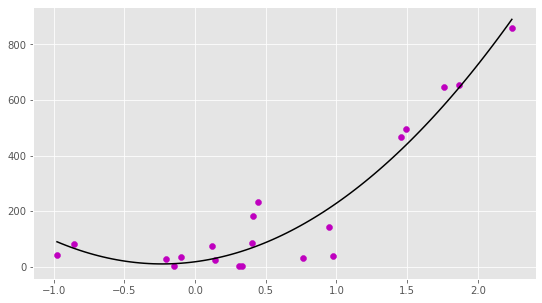

In [84]:
plt.figure(figsize=(9,5))
plt.scatter(X, y2, c='m')
plt.plot(xs, y2_hat, c='k')

So far we have sustained from using a training and testing just to make a point about basis functions, but now we can get into a more realistic example where you actually want to train and test your model. 